# Classification  Project

Welcome to the KNN Project! This will be a simple project very similar to the lecture.




## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read the'KNN_Data'csv file into a dataframe.**

In [178]:
file_path = '/KNN_Data'

df = pd.read_csv(file_path)

**Check the head of the dataframe.**

In [179]:
print(df.head())

          XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0  


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

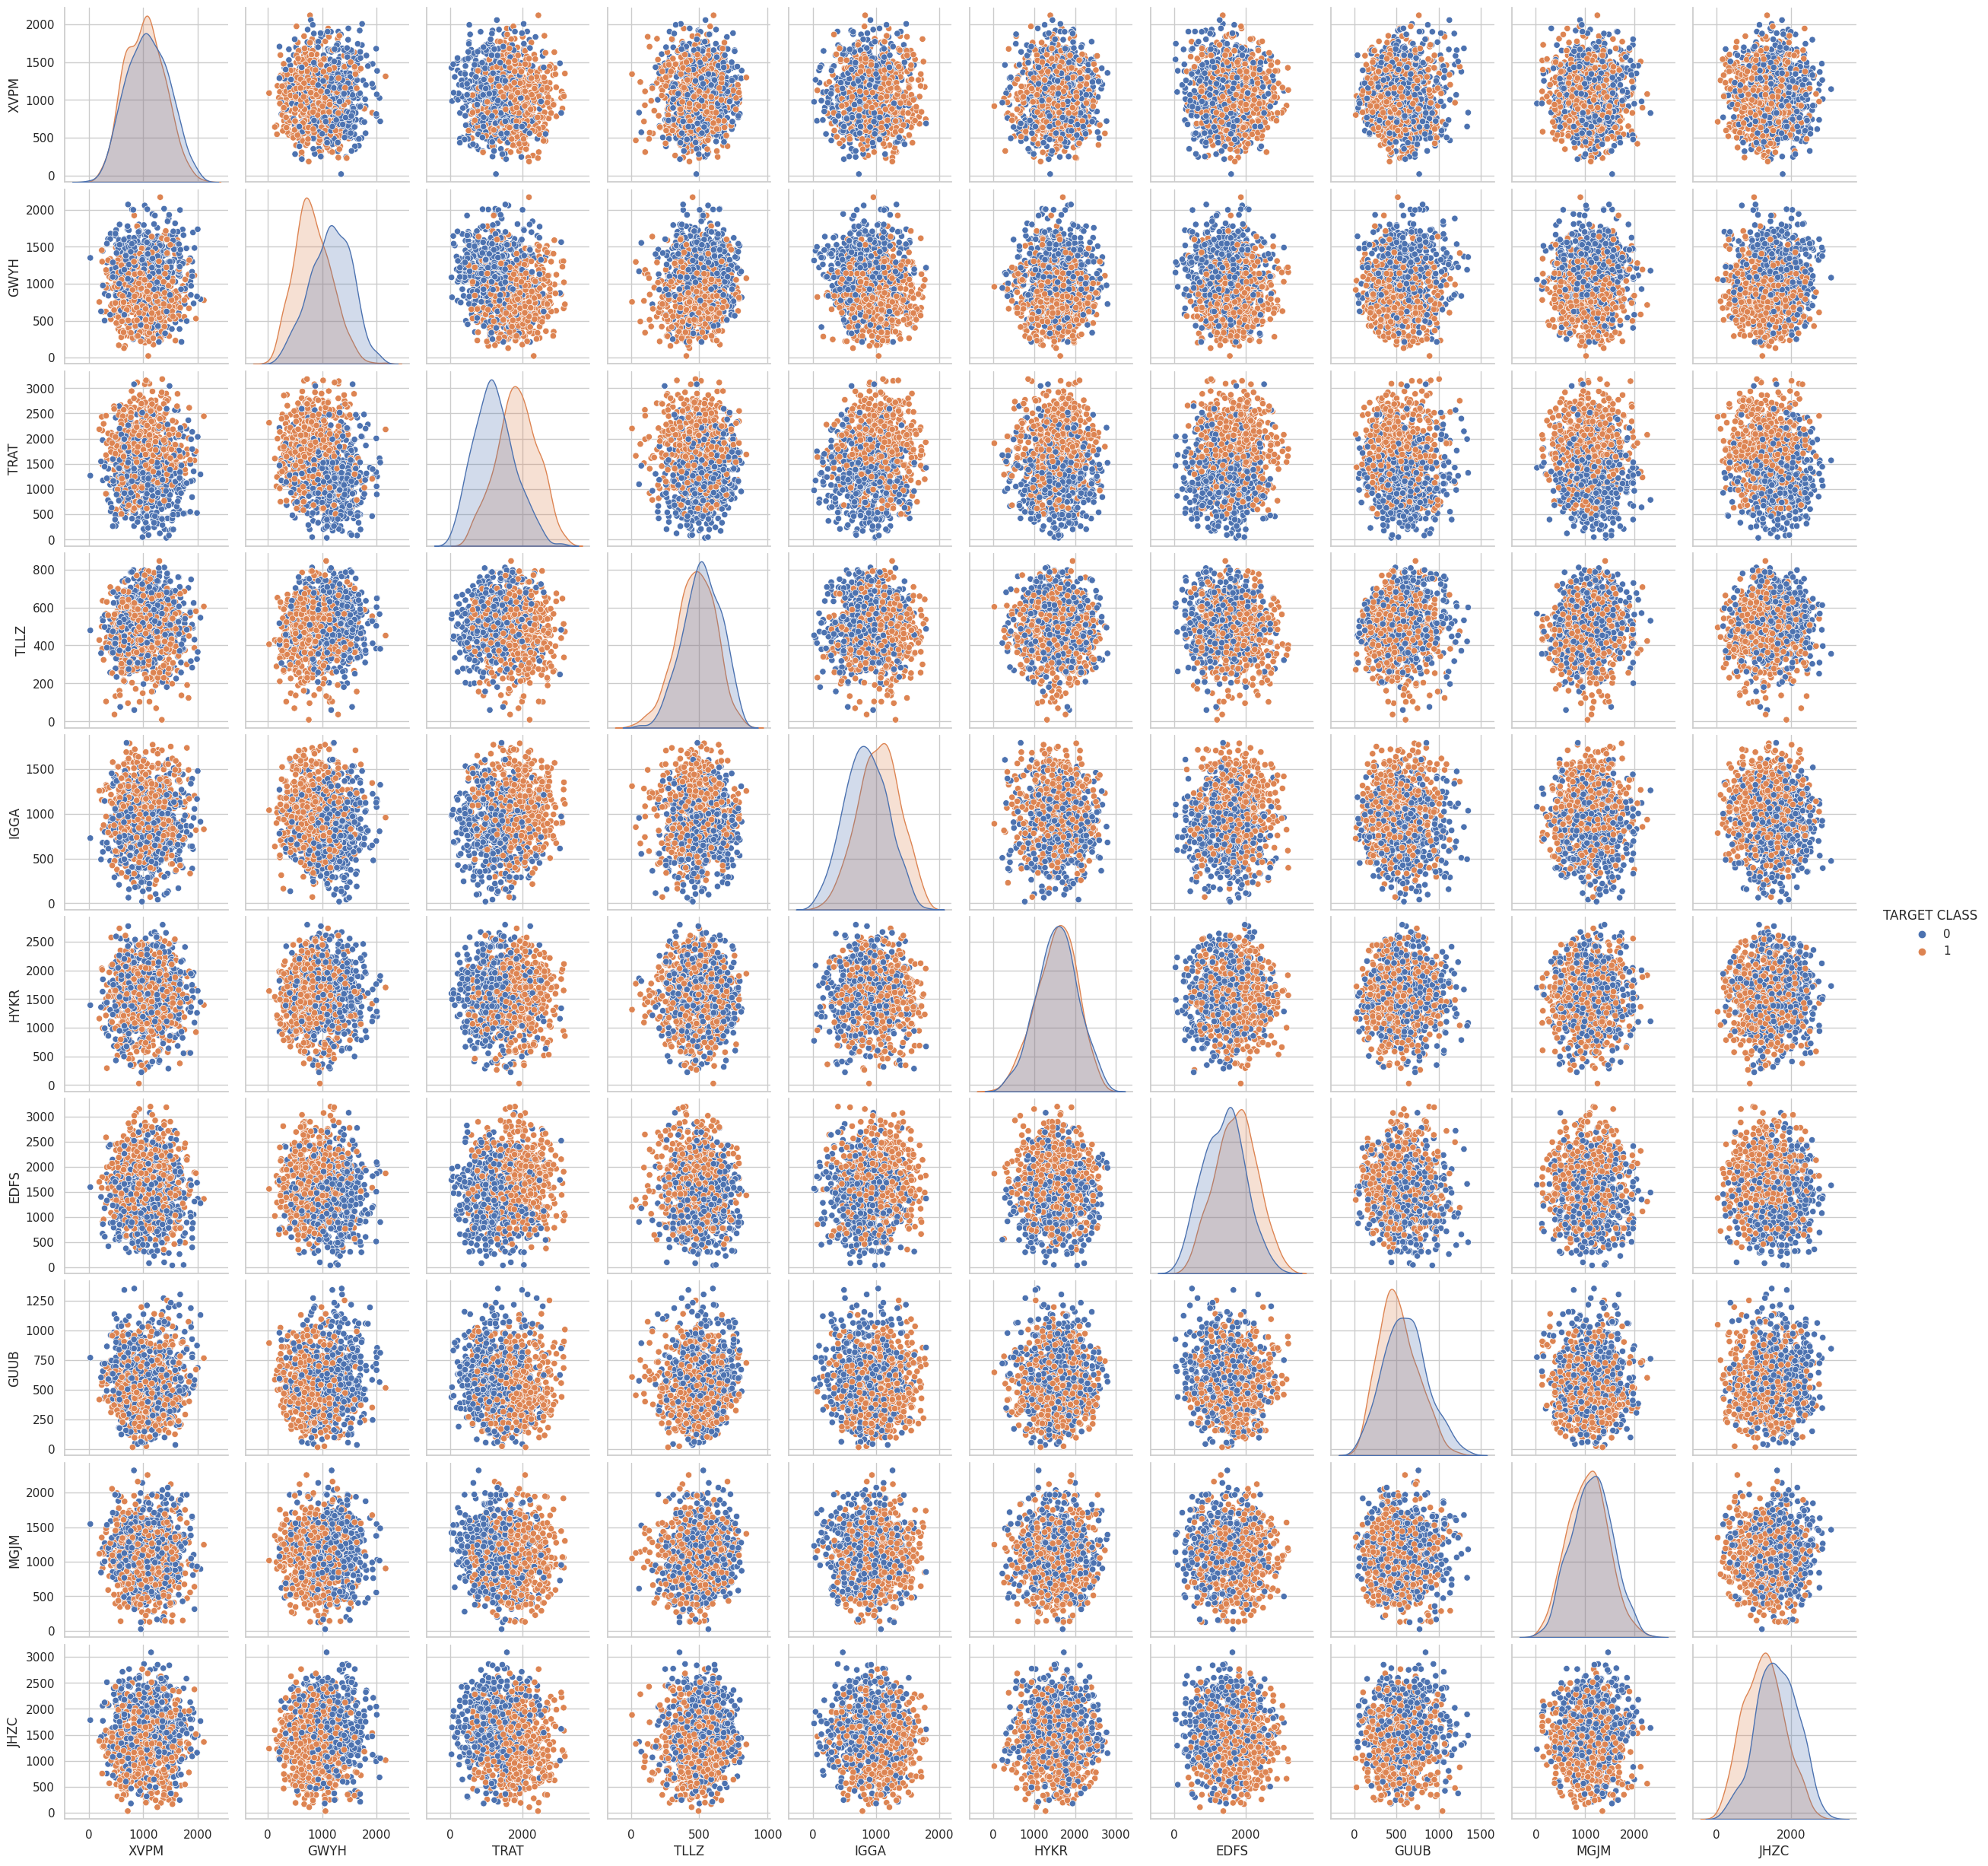

In [208]:
sns.set(style="whitegrid")
sns.pairplot(df, hue="TARGET CLASS")

plt.show()

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [209]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [210]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [211]:
feature_df= df.drop(columns=['TARGET CLASS'])
class_column = df['TARGET CLASS']

In [212]:
scaler.fit(feature_df)

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [213]:
scaled_features = scaler.transform(feature_df)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [214]:
scaled_df = pd.DataFrame(scaled_features, columns=feature_df.columns)
print(scaled_df.head())

       XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762  


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [215]:
from sklearn.model_selection import train_test_split

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [216]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [217]:
knn = KNeighborsClassifier(n_neighbors=1)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,class_column,test_size=0.25,random_state=45)

**Fit this KNN model to the training data.**

In [218]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [219]:
y_pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [220]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [194]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)

[[103  30]
 [ 37  80]]


In [195]:
classify_report_1 = classification_report(y_test, y_pred)
print(classify_report_1)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       133
           1       0.73      0.68      0.70       117

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [223]:
k_values = range(1, 40)
error_rate_arr = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error_rate=np.mean(y_pred != y_test)
  error_rate_arr.append(error_rate)

**Now create the following plot using the information from your for loop.**

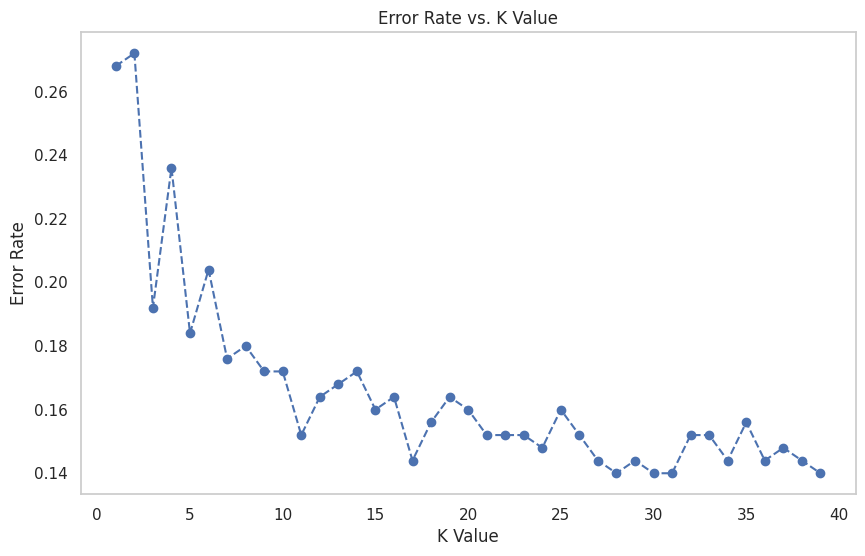

In [224]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,error_rate_arr, marker='o', linestyle='--', color='b')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [225]:
from sklearn.neighbors import KNeighborsClassifier

best_knn_1 = KNeighborsClassifier(n_neighbors=30)
best_knn_1.fit(X_train, y_train)
y_pred = best_knn_1.predict(X_test)

In [226]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_mat_2= confusion_matrix(y_test, y_pred)
print(confusion_mat_2)

[[114  19]
 [ 16 101]]


In [227]:
classify_report_2 = classification_report(y_test, y_pred)
print(classify_report_2)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       133
           1       0.84      0.86      0.85       117

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

##ROC(**bonus**)

In [228]:
best_knn_2 = KNeighborsClassifier(n_neighbors=27)
best_knn_2.fit(X_train, y_train)
y_pred = best_knn_2.predict(X_test)

In [229]:
confusion_mat_3 = confusion_matrix(y_test, y_pred)
print(confusion_mat_3)

[[112  21]
 [ 15 102]]


In [230]:
classify_report_3 = classification_report(y_test, y_pred)
print(classify_report_3)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       133
           1       0.83      0.87      0.85       117

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

